Saving archive (4).zip to archive (4).zip


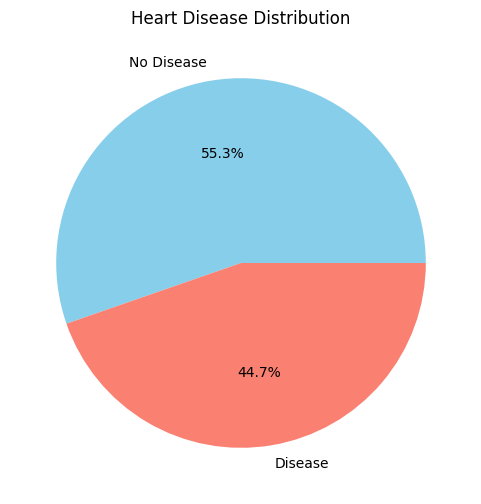

<Figure size 1200x600 with 0 Axes>

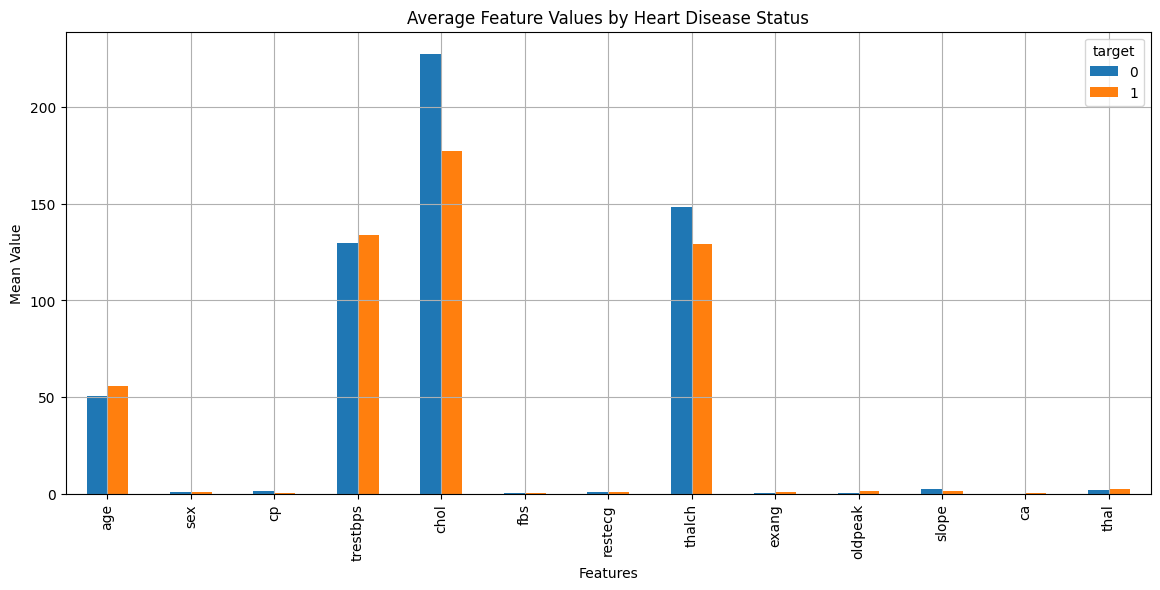

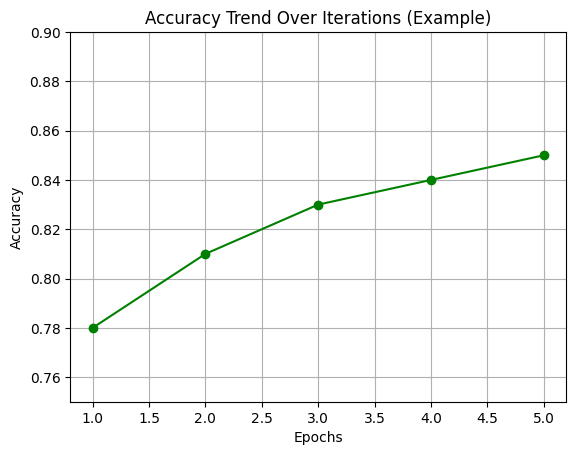

✅ Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        75
           1       0.86      0.76      0.81       109

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184

✅ Model Accuracy: 78.26%


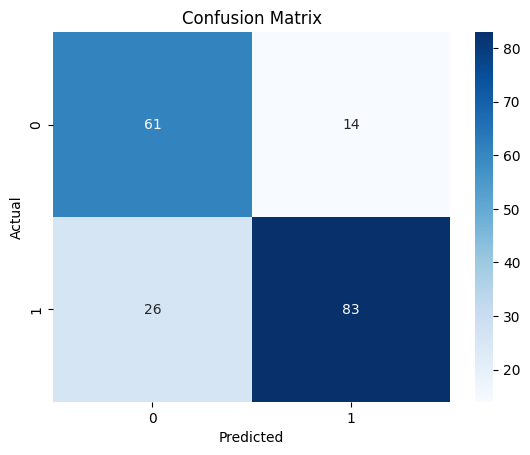

In [1]:
# Step 1: Upload CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load data
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# Step 4: Convert 'num' to binary 'target'
data['target'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Step 5: Drop unnecessary columns
data = data.drop(columns=['id', 'dataset', 'num'], errors='ignore')

# Step 6: Fill missing values
data = data.fillna(data.median(numeric_only=True))

# Step 7: Encode categorical columns
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Step 8: Visualizations
## 8.1 Pie chart of target variable
labels = ['No Disease', 'Disease']
sizes = data['target'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Heart Disease Distribution')
plt.show()

## 8.2 Bar graph: Mean feature values by target
plt.figure(figsize=(12, 6))
data.groupby('target').mean().T.plot(kind='bar', figsize=(14, 6))
plt.title('Average Feature Values by Heart Disease Status')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.grid(True)
plt.show()

## 8.3 Synthetic line chart: Accuracy trend (example)
epochs = [1, 2, 3, 4, 5]
accuracy_trend = [0.78, 0.81, 0.83, 0.84, 0.85]
plt.plot(epochs, accuracy_trend, marker='o', linestyle='-', color='green')
plt.title("Accuracy Trend Over Iterations (Example)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0.75, 0.90)
plt.grid(True)
plt.show()

# Step 9: Split data
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 11: Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 12: Predictions
y_pred = model.predict(X_test)

# Step 13: Evaluation
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred))

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc*100:.2f}%")

# Step 14: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()